# Автострахование 



## Предоставляются данные о годовом страховании автомобилей, по которым необходимо оценить реальное поведение пользователей (получит ли пользователь страховку?)

In [67]:
import numpy as np              
import matplotlib.pyplot as plt 
%matplotlib inline 
    
import pandas as pd             
import seaborn as sns           
import sklearn  

In [68]:
url = "https://raw.githubusercontent.com/mikhalych20/ML/main/Car_Insurance_Claim.csv"
data_raw = pd.read_csv(url)

In [69]:
type(data_raw)


pandas.core.frame.DataFrame

In [70]:
data_raw.shape


(10000, 19)

В таблице содержатся записи о 10000 клиентах, разделенные на 19 категорий:

In [71]:
data_raw

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,323164,26-39,female,majority,10-19y,university,upper class,0.582787,1.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,1,0.0
9996,910346,26-39,female,majority,10-19y,none,middle class,0.522231,1.0,after 2015,0.0,1.0,32765,NaN,sedan,1,0,0,0.0
9997,468409,26-39,male,majority,0-9y,high school,middle class,0.470940,1.0,before 2015,0.0,1.0,10238,14000.0,sedan,0,0,0,0.0
9998,903459,26-39,female,majority,10-19y,high school,poverty,0.364185,0.0,before 2015,0.0,1.0,10238,13000.0,sedan,2,0,1,1.0


In [72]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

Признаки имеют имена:
1. ID - уникальный идентификатор (числовой)
2. AGE - возраст клиента (категориальный)
3. GENDER - пол клиента (категориальный)
4. RACE - раса (категориальный)
4. DRIVING_EXPERIENCE - стаж вождения клиента (категориальный)
5. EDUCATION - образование (категориальный)
6. INCOME - доход (категориальный)
7. CREDIT_SCORE	 - кредитный рейтинг(числовой)
8. VEHICLE_OWNERSHIP - наличие автомобиля (имеется ли автомобиль?) (числовой)
9. VEHICLE_YEAR - год покупки автомобиля (категориальный)	
10. MARRIED - семейное положение (числовой)
11. CHILDREN - наличие детей (числовой)	
12. POSTAL_CODE - почтовый индекс (числовой)	
13. ANNUAL_MILEAGE - пробег автомобиля (числовой)
14. VEHICLE_TYPE - тип транспортного средства (категориальный)	
15. SPEEDING_VIOLATIONS - штрафы за превышение скорости (числовой)	
16. DUIS - вождение в нетрезвом виде (числовой)
17. PAST_ACCIDENTS - аварии (числовой)
18. OUTCOME - результат выдачи страховки (числовой)

Заменим тип 'object' на специальный, предназначенный для хранения категориальных значений:

In [73]:
data_raw_1 = data_raw.copy()
data_raw['AGE'] = data_raw['AGE'].astype('category')
data_raw['GENDER'] = data_raw['GENDER'].astype('category')
data_raw['RACE'] = data_raw['RACE'].astype('category')
data_raw['DRIVING_EXPERIENCE'] = data_raw['DRIVING_EXPERIENCE'].astype('category')
data_raw['EDUCATION'] = data_raw['EDUCATION'].astype('category')
data_raw['INCOME'] = data_raw['INCOME'].astype('category')
data_raw['VEHICLE_YEAR'] = data_raw['VEHICLE_YEAR'].astype('category')
data_raw['VEHICLE_TYPE'] = data_raw['VEHICLE_TYPE'].astype('category')


In [74]:
data_raw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   10000 non-null  int64   
 1   AGE                  10000 non-null  category
 2   GENDER               10000 non-null  category
 3   RACE                 10000 non-null  category
 4   DRIVING_EXPERIENCE   10000 non-null  category
 5   EDUCATION            10000 non-null  category
 6   INCOME               10000 non-null  category
 7   CREDIT_SCORE         9018 non-null   float64 
 8   VEHICLE_OWNERSHIP    10000 non-null  float64 
 9   VEHICLE_YEAR         10000 non-null  category
 10  MARRIED              10000 non-null  float64 
 11  CHILDREN             10000 non-null  float64 
 12  POSTAL_CODE          10000 non-null  int64   
 13  ANNUAL_MILEAGE       9043 non-null   float64 
 14  VEHICLE_TYPE         10000 non-null  category
 15  SPEEDING_VIOLATIONS 

### Основные характеристики:

In [75]:
data_raw.describe()


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
count,10000.000000,9018.000000,10000.000000,10000.000000,10000.000000,10000.000000,9043.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,0.137688,0.459578,0.500022,0.463008,18915.613855,2818.434528,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,0.417191,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,0.525033,1.000000,0.000000,1.000000,10238.000000,12000.000000,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,0.618312,1.000000,1.000000,1.000000,32765.000000,14000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


In [76]:
data_raw.describe(include=['category'])

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,VEHICLE_YEAR,VEHICLE_TYPE
count,10000,10000,10000,10000,10000,10000,10000,10000
unique,4,2,2,4,3,4,2,2
top,26-39,female,majority,0-9y,high school,upper class,before 2015,sedan
freq,3063,5010,9012,3530,4157,4336,6967,9523


Видим, что большинство клиентов, запрашивающих страховку ранее не имели нарушений ПДД, фиксирующихся в таблице. При этом мы видим, что максимальное число нарушений у одного человек зафиксированн: 22 - превышение скорости, 6 - вождение в нетрезвом виде, 15 - аварийные ситуации. Максимальный кредитный рейтинг равен 0.96. Преобладает маленький водительский стаж (0-9), в основном за страховкой обратились люди в возрасте 26-39 лет, большинство из обратившихся - женщины. Обратившиеся в основном закончили старшую школу и имеют высокий уровень достатка. 

### Матрица корреляции:

In [77]:
corr_mat = data_raw_1.corr()
corr_mat

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.000000,0.001704,0.009197,0.014826,0.001233,0.006038,-0.002217,0.008156,0.009268,0.001831,-0.010506
CREDIT_SCORE,0.001704,1.000000,0.312037,0.281238,0.220658,0.009040,-0.174453,0.204542,0.127366,0.180978,-0.325286
VEHICLE_OWNERSHIP,0.009197,0.312037,1.000000,0.175626,0.125990,-0.004866,-0.097433,0.133868,0.086567,0.119521,-0.378921
MARRIED,0.014826,0.281238,0.175626,1.000000,0.287009,0.012045,-0.462193,0.218855,0.120840,0.215269,-0.262104
CHILDREN,0.001233,0.220658,0.125990,0.287009,1.000000,0.020911,-0.447655,0.220415,0.115354,0.206295,-0.232835
POSTAL_CODE,0.006038,0.009040,-0.004866,0.012045,0.020911,1.000000,-0.133978,0.113686,0.038492,-0.116985,0.095889
ANNUAL_MILEAGE,-0.002217,-0.174453,-0.097433,-0.462193,-0.447655,-0.133978,1.000000,-0.323547,-0.116598,-0.195217,0.187154
SPEEDING_VIOLATIONS,0.008156,0.204542,0.133868,0.218855,0.220415,0.113686,-0.323547,1.000000,0.359838,0.443074,-0.291862
DUIS,0.009268,0.127366,0.086567,0.120840,0.115354,0.038492,-0.116598,0.359838,1.000000,0.259359,-0.189352
PAST_ACCIDENTS,0.001831,0.180978,0.119521,0.215269,0.206295,-0.116985,-0.195217,0.443074,0.259359,1.000000,-0.311495


Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции:

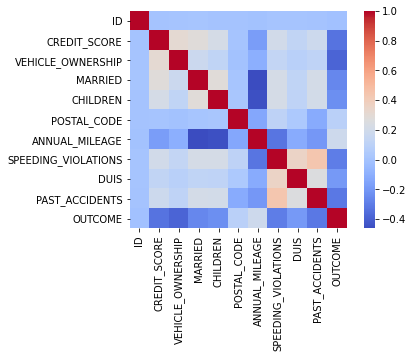

In [78]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

Выведем коэффициенты корреляции, большие заданного значения:

In [79]:
corr_mat >= 0.4

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,True,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,True,False,False,False,False,False,False,False,False,False
VEHICLE_OWNERSHIP,False,False,True,False,False,False,False,False,False,False,False
MARRIED,False,False,False,True,False,False,False,False,False,False,False
CHILDREN,False,False,False,False,True,False,False,False,False,False,False
POSTAL_CODE,False,False,False,False,False,True,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,False,False,False,True,False,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,False,True,False,True,False
DUIS,False,False,False,False,False,False,False,False,True,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,True,False,True,False


Положительная корреляция показывает взаимосвязь пропорционального возрастания величин.Видим, что с признаком DUIS больше всего связаны признаки SPEEDING_VIOLATIONS и PAST_ACCIDENTS, что логично, ведь вождение в нетрезвом виде повышает вероятность превышения скорости и создания аварийных ситуаций. 

In [80]:
corr_mat.where(np.triu(corr_mat >= 0.35, k=1)).stack().sort_values(ascending=False)

SPEEDING_VIOLATIONS  PAST_ACCIDENTS    0.443074
                     DUIS              0.359838
dtype: float64

In [81]:
corr_mat <= -0.3


,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,False,False,False,False,False,False,False,False,False,False,False
CREDIT_SCORE,False,False,False,False,False,False,False,False,False,False,True
VEHICLE_OWNERSHIP,False,False,False,False,False,False,False,False,False,False,True
MARRIED,False,False,False,False,False,False,True,False,False,False,False
CHILDREN,False,False,False,False,False,False,True,False,False,False,False
POSTAL_CODE,False,False,False,False,False,False,False,False,False,False,False
ANNUAL_MILEAGE,False,False,False,True,True,False,False,True,False,False,False
SPEEDING_VIOLATIONS,False,False,False,False,False,False,True,False,False,False,False
DUIS,False,False,False,False,False,False,False,False,False,False,False
PAST_ACCIDENTS,False,False,False,False,False,False,False,False,False,False,True


Отрицательная корреляция показывает обратную взаимосвязь: за счет возрастания одной величины, убывает другая. Мы видим такую взаимосвязь признаков PAST_ACCIDENTS и OUTCOME: компании совсем не выгодно одобрять страховку тем, кто часто попадает в аварии. Так же прослеживается связь между признаками CHILDREN, ANNUAL_MILEAGE и MARRIED. Это, возможно, связано с тем, что люди, не имеющие семью и детей более мобильны, соответственно их автомобильный пробег будет больше. Так же можно проследить обратную связь признаков SPEEDING_VIOLATIONS и CHILDREN: люди, у которых есть дети аккуратнее водят машину. 

In [82]:
corr_mat.where(np.triu(corr_mat <= -0.3, k=1)).stack().sort_values(ascending=False)

PAST_ACCIDENTS     OUTCOME               -0.311495
ANNUAL_MILEAGE     SPEEDING_VIOLATIONS   -0.323547
CREDIT_SCORE       OUTCOME               -0.325286
VEHICLE_OWNERSHIP  OUTCOME               -0.378921
CHILDREN           ANNUAL_MILEAGE        -0.447655
MARRIED            ANNUAL_MILEAGE        -0.462193
dtype: float64

Построим некоторые связи:


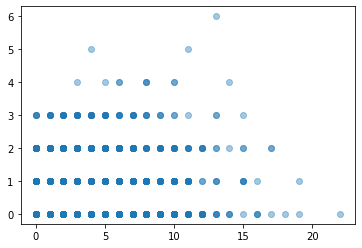

In [83]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['DUIS'], alpha=0.4)
pass

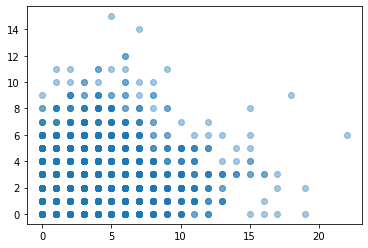

In [84]:
plt.scatter(data_raw['SPEEDING_VIOLATIONS'], data_raw['PAST_ACCIDENTS'], alpha=0.4)
pass

Построим гистаграммы зависимостей:

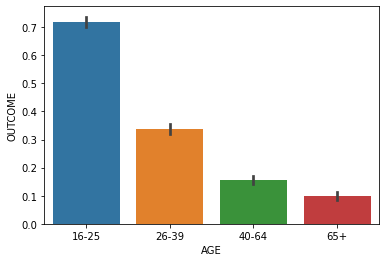

In [85]:
sns.barplot(data=data_raw, x="AGE", y="OUTCOME")

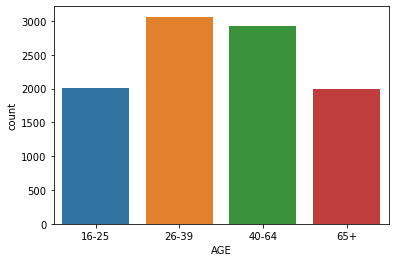

In [86]:
sns.countplot(x='AGE', data=data_raw)
pass

Видим, что больше всего получение страховуи запрашивают люди возраста 26-64 года, однако чаще страховку одобряют более молодым водителям, так как у них скорее всего более хорошая кредитная история, меньше нарушений (возможно, у кого-то это страховка на его первый автомобиль)

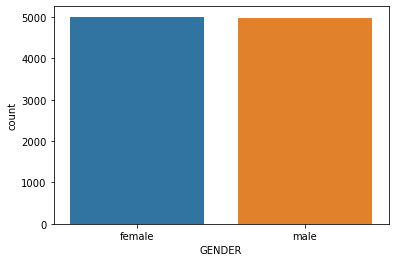

In [87]:
sns.countplot(x='GENDER', data=data_raw)
pass

Видим, что не смотря на небольшое преобладание женского пола, в страховке заинтересованы все

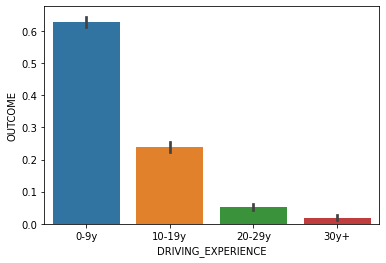

In [88]:
sns.barplot(data=data_raw, x="DRIVING_EXPERIENCE", y="OUTCOME")

Видим, что страховку скорее одобрят водителям с меньшим стажем (скорее всего причина аналогична одобрению страховки более молодым водителям)

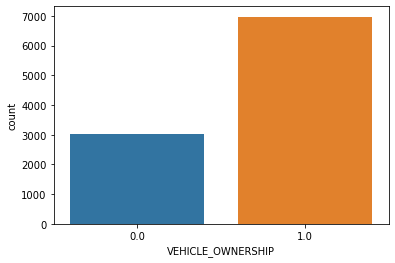

In [89]:
sns.countplot(x='VEHICLE_OWNERSHIP', data=data_raw)
pass

Очевидно, в получении страховки больше заинтересованы люди, у которых есть свой автомобиль.

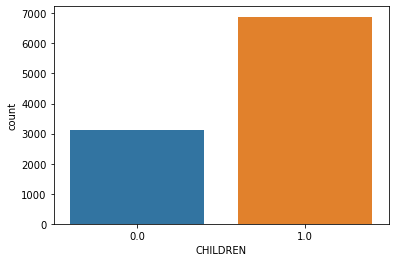

In [90]:
sns.countplot(x='CHILDREN', data=data_raw)
pass

Видим, что в страховке скорее заинтересованы люди, у которых есть дети

## Пропущенные значения

Проверим наличие пропущенных значений и их количество:

In [91]:
data_raw.isna().sum()

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64

Заполним пропущенные значения. Так как оба признака числовые, заполнять будем медианной:

In [29]:
data_raw.fillna(data_raw.median(axis = 0), axis=0 , inplace=True)

Проверим заполнение:

In [30]:
data_raw.isna().sum()

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64

Пропущенных значений больше нет

## Обработка котегориальных признаков

Для последующей нормализации признаков, нам необходимо закодировать категориальные признаки с помощью числовых:
заменим бинарные признаки на 0 и 1, а к небинарным применим метод бинаризации

In [31]:
AGE_dummies = pd.get_dummies(data_raw['AGE'])
DRIVING_EXPERIENCE_dummies = pd.get_dummies(data_raw['DRIVING_EXPERIENCE'])
EDUCATION_dummies = pd.get_dummies(data_raw['EDUCATION'])
INCOME_dummies = pd.get_dummies(data_raw['INCOME'])
data_raw['GENDER'] = pd.factorize(data_raw['GENDER'])[0]
data_raw['RACE'] = pd.factorize(data_raw['RACE'])[0]
data_raw['VEHICLE_YEAR'] = pd.factorize(data_raw['VEHICLE_YEAR'])[0]
data_raw['VEHICLE_TYPE'] = pd.factorize(data_raw['VEHICLE_TYPE'])[0]
data_raw.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,0,0,0-9y,high school,upper class,0.629027,1.0,0,0.0,1.0,10238,12000.0,0,0,0,0,0.0
1,750365,16-25,1,0,0-9y,none,poverty,0.357757,0.0,1,0.0,0.0,10238,16000.0,0,0,0,0,1.0
2,199901,16-25,0,0,0-9y,high school,working class,0.493146,1.0,1,0.0,0.0,10238,11000.0,0,0,0,0,0.0
3,478866,16-25,1,0,0-9y,university,working class,0.206013,1.0,1,0.0,1.0,32765,11000.0,0,0,0,0,0.0
4,731664,26-39,1,0,10-19y,none,working class,0.388366,1.0,1,0.0,0.0,32765,12000.0,0,2,0,1,1.0


Обработаем признаки "AGE", "DRIVING_EXPERIENCE", "EDUCATION", "INCOME"

In [32]:
data_raw = pd.get_dummies(data_raw)
print(data_raw.shape)
data_raw.head()

(10000, 30)


,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
0,569520,0,0,0.629027,1.0,0,0.0,1.0,10238,12000.0,...,0,0,0,1,0,0,0,0,1,0
1,750365,1,0,0.357757,0.0,1,0.0,0.0,10238,16000.0,...,0,0,0,0,1,0,0,1,0,0
2,199901,0,0,0.493146,1.0,1,0.0,0.0,10238,11000.0,...,0,0,0,1,0,0,0,0,0,1
3,478866,1,0,0.206013,1.0,1,0.0,1.0,32765,11000.0,...,0,0,0,0,0,1,0,0,0,1
4,731664,1,0,0.388366,1.0,1,0.0,0.0,32765,12000.0,...,1,0,0,0,1,0,0,0,0,1


### Наличие выбросов

##### Числовые признаки:

In [33]:
data_raw['CREDIT_SCORE'].value_counts()

0.525033    982
0.416992      1
0.489497      1
0.404057      1
0.327697      1
           ... 
0.810278      1
0.258656      1
0.309254      1
0.343953      1
0.633064      1
Name: CREDIT_SCORE, Length: 9019, dtype: int64

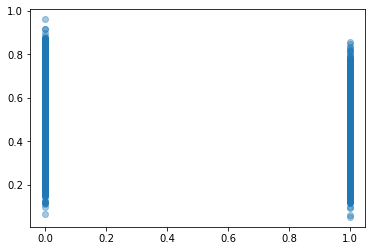

In [34]:
plt.scatter(data_raw['OUTCOME'], data_raw['CREDIT_SCORE'], alpha=0.4)
pass

In [35]:
data_raw['VEHICLE_OWNERSHIP'].value_counts()

1.0    6970
0.0    3030
Name: VEHICLE_OWNERSHIP, dtype: int64

In [36]:
data_raw['MARRIED'].value_counts()

0.0    5018
1.0    4982
Name: MARRIED, dtype: int64

In [37]:
data_raw['CHILDREN'].value_counts()

1.0    6888
0.0    3112
Name: CHILDREN, dtype: int64

In [38]:
data_raw['POSTAL_CODE'].value_counts()

10238    6940
32765    2456
92101     484
21217     120
Name: POSTAL_CODE, dtype: int64

In [39]:
data_raw['ANNUAL_MILEAGE'].value_counts()

12000.0    2175
11000.0    1253
13000.0    1137
10000.0    1071
14000.0     894
9000.0      856
15000.0     632
8000.0      557
16000.0     419
7000.0      322
17000.0     246
6000.0      165
18000.0     103
5000.0       65
19000.0      48
4000.0       27
20000.0      13
3000.0       10
21000.0       3
22000.0       2
2000.0        2
Name: ANNUAL_MILEAGE, dtype: int64

In [40]:
data_raw['SPEEDING_VIOLATIONS'].value_counts()

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: SPEEDING_VIOLATIONS, dtype: int64

In [41]:
data_raw['DUIS'].value_counts()

0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: DUIS, dtype: int64

In [42]:
data_raw['PAST_ACCIDENTS'].value_counts()

0     5584
1     1783
2     1104
3      646
4      366
5      232
6      144
7       61
8       41
9       19
10       9
11       7
12       2
15       1
14       1
Name: PAST_ACCIDENTS, dtype: int64

In [43]:
data_raw['OUTCOME'].value_counts()

0.0    6867
1.0    3133
Name: OUTCOME, dtype: int64

## Нормализация признаков

Нормализация подразумевает изменение диапазонов в данных без изменения формы распределения, приводим значения к диапазону [0;1]

In [44]:
data_normal = (data_raw - data_raw.min(axis=0)) / (data_raw.max(axis=0) - data_raw.min(axis=0))
data_normal.describe()

,ID,GENDER,RACE,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,...,DRIVING_EXPERIENCE_10-19y,DRIVING_EXPERIENCE_20-29y,DRIVING_EXPERIENCE_30y+,EDUCATION_high school,EDUCATION_none,EDUCATION_university,INCOME_middle class,INCOME_poverty,INCOME_upper class,INCOME_working class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.500483,0.499000,0.098800,0.510612,0.697000,0.696700,0.498200,0.688800,0.117593,0.486300,...,0.3299,0.211900,0.105200,0.415700,0.191500,0.392800,0.213800,0.181400,0.433600,0.171200
std,0.290067,0.500024,0.298408,0.144117,0.459578,0.459707,0.500022,0.463008,0.231064,0.134082,...,0.4702,0.408675,0.306826,0.492867,0.393501,0.488397,0.410008,0.385369,0.495596,0.376702
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.249569,0.000000,0.000000,0.416714,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.501739,0.000000,0.000000,0.519774,1.000000,1.000000,0.000000,1.000000,0.000000,0.500000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.753968,1.000000,0.000000,0.610769,1.000000,1.000000,1.000000,1.000000,0.275179,0.550000,...,1.0000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Выбор признаков

Логично использовать все признаки, кроме ID, так как он создается только для уникальной идентификации

In [45]:
X = data_normal.drop (['ID', 'OUTCOME'], axis=1) 
y = data_raw['OUTCOME']

Разбиваем данные на обущающую и тестовую выборки (75% обучающая выборка, 25% - тестовая)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
N_train, N_test

(7500, 2500)

## Классификатор ближайших соседей

In [47]:
#from sklearn.neighbors import KNeighborsClassifier
#knn_def = KNeighborsClassifier()
#knn_def.fit(X_train, y_train)
#err_tr = 100 * knn_def.score(X_train, y_train)
#err_te= 100 * knn_def.score(X_test, y_test)
#print("Accuracy. Train : {:.2f}%, Test: {:.2f}%. ".format(err_tr, err_te))

In [48]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [49]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [50]:
err_test*100, err_train*100

(18.4, 14.84)

Получаем ошибку на тестовой выборке 18.4%, а на обучающей 14.84%.

Увеличим число соседей до 20:

In [51]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 20)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=20)

In [52]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)
y_train_predict=knn.predict(X_train)
err_train  = np.mean(y_train  != y_train_predict)

In [53]:
err_test*100, err_train*100

(17.8, 16.2)

Видим, что точность на тестовой выборке увеличилась, но уменьшилась на обучающей

## Выводы 

Анализируя данные, мы выявляли, будет получена страховка или нет. Обучение и классификация проводились с помощью метода ближайших k-соседей (рассмотрены случаи 10 и 20 соседей). Полученный процент ошибок: на тестовой выборке 18.4%, на обучающей 14.84% при 10 соседях и 17.8% на тестовой выборке, на обучающей 16.2% при 20 соседях. Значения ошибок получились достаточно большими, возможно, из-за того, что при решении о выдече страховки учитывается множество факторов, в том числе и некая удача, что клиент не попадет в аварию или не превысит скорость. Возможно, результаты ошибок можно улучшить, используе другой классификатор.

# Обучение нейронной сети

In [54]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

### Обучение модели при различном числе нейронов в скрытом слоe, изображение зависимости между величиной ошибки и количеством нейронов. 


In [55]:
n_array = np.linspace(1, 50, 50)
n_array = n_array.astype(int)
test_err = []
train_err = []
test_acc = []
train_acc = []

for n in n_array:
  mlp_model = MLPClassifier(hidden_layer_sizes = (n,),
                          solver = 'adam', 
                          max_iter=10000,
                          activation = 'relu',
                          random_state = 42)
  mlp_model.fit(X_train, y_train)
  y_train_pred = mlp_model.predict(X_train) 
  y_test_pred = mlp_model.predict(X_test)
  train_err.append(np.mean(y_train != y_train_pred))
  test_err.append(np.mean(y_test != y_test_pred))
  train_acc.append(accuracy_score(y_train, y_train_pred))
  test_acc.append(accuracy_score(y_test, y_test_pred))

In [56]:
print("Минимальное значение ошибки на обучающей выборке достигнуто при количестве нейронов: " + str(n_array[np.argmin(train_err)]))
print(np.min(train_err))

print("Минимальное значение ошибки на тестовой выборке достигнуто при количестве нейронов: " + str(n_array[np.argmin(test_err)]))
print(np.min(test_err))

Минимальное значение ошибки на обучающей выборке достигнуто при количестве нейронов: 50
0.11506666666666666
Минимальное значение ошибки на тестовой выборке достигнуто при количестве нейронов: 4
0.154


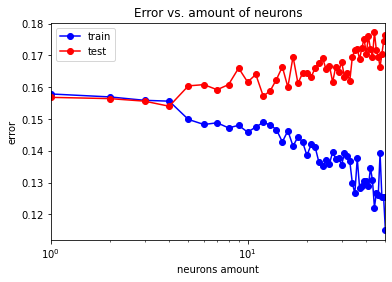

In [57]:
plt.semilogx(n_array, train_err, 'b-o', label = 'train')
plt.semilogx(n_array, test_err, 'r-o', label = 'test')
plt.xlim([np.min(n_array), np.max(n_array)])
plt.title('Error vs. amount of neurons')
plt.xlabel('neurons amount')
plt.ylabel('error')
plt.legend()

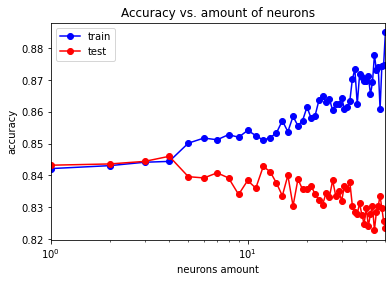

In [58]:
plt.semilogx(n_array, train_acc, 'b-o', label = 'train')
plt.semilogx(n_array, test_acc, 'r-o', label = 'test')
plt.xlim([np.min(n_array), np.max(n_array)])
plt.title('Accuracy vs. amount of neurons')
plt.xlabel('neurons amount')
plt.ylabel('accuracy')
plt.legend()

In [59]:
alpha_arr = np.logspace(-3, 2, 21)
test_err = []
train_err = []
test_acc = []
train_acc = []

for alpha in alpha_arr :
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (5,), 
                              solver = 'adam', activation = 'relu', max_iter=100000, random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print("Минимальное значение ошибки на обучающей и тестовой выборках:")
print(min_train_err, min_test_err)
    
alpha_opt = alpha_arr[test_err == min_test_err]
print("Оптимальное значение параметра:" + str(alpha_opt[0]))
    

Минимальное значение ошибки на обучающей и тестовой выборках:
0.14933333333333335 0.1532
Оптимальное значение параметра:0.5623413251903491


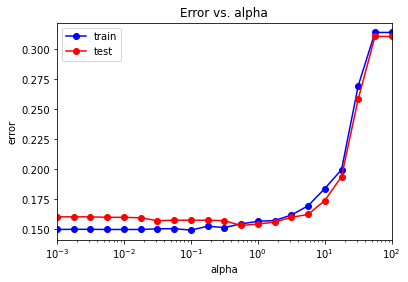

In [60]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'train')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()

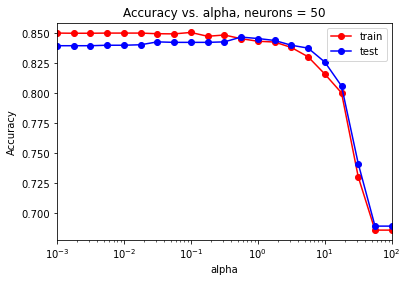

In [61]:
plt.semilogx(alpha_arr, train_acc, 'r-o', label = 'train')
plt.semilogx(alpha_arr, test_acc, 'b-o', label = 'test')
plt.xlim([np.min(alpha_arr), np.max(alpha_arr)])
plt.title('Accuracy vs. alpha, neurons = ' + str(n))
plt.xlabel('alpha')
plt.ylabel('Accuracy')
plt.legend()

In [62]:
alpha_optimal = alpha_opt[0]
mlp_model = MLPClassifier(alpha = alpha_optimal, hidden_layer_sizes = (5,),
                          solver = 'adam', activation = 'relu', max_iter=100000, random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print("Ошибка на обучающей выборке: " + str(np.mean(y_train != y_train_pred)))
print("Ошибка на тестовой выборке: " + str(np.mean(y_test != y_test_pred)))

Ошибка на обучающей выборке: 0.15453333333333333
Ошибка на тестовой выборке: 0.1532
